# Socio-economic impact of coronavirus

__D.Tristram, Final project Ironhack Bootcamp Data analytics, 16.12.2020__

##### Table of content

##### 1. Scope of Analysis
   1.1 Description of analysis \
   1.2 Methodology \
   1.3 Hypothesis

##### 2. Importing tools and data

##### 3. Checking the data

##### 4. Data manupulation / Preprocessing
   4.1 Changing the categorical columns to numerical \
   4.2 Setting column Time to datetime format \
   4.3 Dealing with NAN values

##### 5. EDA: Data explained by descriptive statistics
   5.1 Describing the data \
   5.2 Analyzing Unemployment_rate and Youth_unemployment_rate over time \
   5.3 Plotting and interpretating the results of time series analysis \
   5.4 Analysing mean average of youth unemployment and total unemployment from researched countries \
   5.5 Plotting results \
   5.6 Analyzing average mean of all used indicators over time intervall 2010 - 2020 \
   5.7 Plotting Balance Payment and Trade Volume over time 01/2010 - 09/2020 by lineplot \
   5.8 Scatterplot Sentiment indicator & Balance Payment and Trade Volume over time 01/2010 - 09/2020 by lineplot  \
   5.9 Plotting Inflation rate, Rental housing, Sentiment_indicators, Slaughtering_in_slaughterhouses over time 01/2010 - 09/2020 by lineplot \
   5.10 Interpretation of Lineplot \
   
##### 6. EDA: Analyzing linear relation between Economic Sentiment Indicator and independent indicators by scatterplot visualisation containing regression line
   

   

##### 7. Inferential statistics
   7.1 Hypothesis prove of Economic Sentiment Indicator by one-sided T-test \
   7.2 P-value

##### 8. Correlation
   8.1 Correlation Matrix \
   8.2 Interpretation of results \
   8.3 Autocorrelation \
   8.4 Conclusion of the results so far and the next steps

##### 9. Panel analysis: modeling regression on Economic Sentiment Indicator
   9.1 Using Train/Test Split on Dataframe \
   9.2 Defining models for linear Regression Sklearn \
   9.3 Using SVR Model, KNeighbors Regressor, DecisionTree Regressor, Gradient Booster, RandomForest Regressor, MLP Regressor \
   9.4 Interpretation of results Regression on Economic Sentiment Indicator

###### 10. Panel analysis: modeling regression on Youth Unemployment Rate
   10.1 Using Train/Test Split on Dataframe \
   10.2 Defining models for linear Regression Sklearn \
   10.3 Using SVR Model, KNeighbors Regressor, DecisionTree Regressor, Gradient Booster, RandomForest Regressor, MLP Regressor \
   10.4 Interpretation of results Regression sklearn-models on Youth unemployment rate
   10.5 Multiple Regression on Youth Unemployment Rate with Statsmodels \
   10.6 Multiple linear Regression on Youth Unemployment Rate with Statsmodels \
   10.7 Visualisation of choosen single linear relations by plotting with regression scatter plots \
   10.8 Interpretation of results

##### 11. Conclusion of Analysis

# 1. Scope of Analysis

The following machine learning analysis is based on coronarelated socio-economic indicators from EUROSTATS. \
See:https://ec.europa.eu/eurostat/web/covid-19/data for source

##### 1.1 Description of analysis

Using indicators, the influence of Corona on selected countries and socio-economic sectors is statistically evaluated using time series analysis. The type, strength and interdependence of the examined indicators are checked analytically. The results will be compared with subsequent visualization.

We all know that Coronavirus has a strong influence of nearly everybody´s life in Europe. You get loads of descriptive statistics of single indicators for this.

But how can interactions between individual indicators be measured and dependence be visualized?

This analysis attempts to provide answers to these questions based on selected indicators through exploratory and inferential data analysis first. Second advanced statistical models are used through machine learning algorithms using Python.



##### 1.2 Methodology

The analysis is based on panel data table I built by indicators. I do use time series of data from January 2010 – September 2020 on following 13 countries: \
    Belgium, Bulgaria, Chekia, Germany, Denmark, Estonia, Greece, Spain, Finland, France, Hungary, Italia, Lithuania.
    
For each of the 13 countries 8 indicators are used with 129 data points for each indicator, leads to a total datapoints for modelbuilding in machine learning analysis of: \
Total: 13.416 

Indicators used are: Inflation rate, Rent prices, Balance of payments by country, Member states EU trade by product group, Sentiment indicator Economy, Unemployment rate total, Youth unemployment rate (under 25), Slaughtering in Slaughterhouses 

##### 1.3 Hypothesis

Main scope of Hypothesis is the Economic Sentiment Indicator.

The economic sentiment indicator (ESI) is a composite indicator produced by the Directorate General for Economic and Financial Affairs (DG ECFIN) of the European Commission. Its objective is to track GDP growth at Member states, EU and euro area levels. The ESI is a weighted average of the balances of replies to selected questions addressed to firms in five sectors covered by the EU Business and Consumer Surveys and to consumers. The sectors covered are industry (weight 40 %), services (30 %), consumers (20 %), retail (5 %) and construction (5 %). Balances are constructed as the difference between the percentages of respondents giving positive and negative replies. EU and euro-area aggregates are calculated on the basis of the national results and seasonally adjusted. The ESI is scaled to a long-term mean of 100 and a standard deviation of 10. Thus, values above 100 indicate above-average economic sentiment and vice versa. Data are seasonally adjusted (SA).

Can the Economic Sentiment Indicator be explained by the other indicators used?
    Further:
    Exists a significant impact of Coronavirus on Economic Sentiment Indicator?
    How strong is Correlation between indicators and dependence of Economic Sentiment Indicator?

__Hypothesis 1__

__H0:__ There is no significant influence. The independent variables cannot explain the Economic Sentiment Indicator

__H1:__ There is a significant influence. The independent variables can explain the Economic Sentiment Indicator

Apart from that the analysis tries to have a look on Youth unemployment. 
Is the youth more affected by Coronavirus and the unemployment rate higher than the total unemployment rate?

__Hypothesis 2: H1: Corona has an impact in Youth unemployment in Europe:__ \
__Hypothesis 3: H1: The Economic Sentiment Indicator has significant difference of means along the countries pictured:__ <br> 
__Hypothesis 4: H1: Paneldata of available indicators can explain dependence of Youth unemployment:__ 

# 2. Importing tools and data

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

from tqdm.notebook import tqdm

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_columns', None)

Importing paneldata and show head, remove index column

In [2]:
df = pd.read_excel('3_Panel_data_final_master.xlsx')
df.head()

,Country,Time,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
0,BE,2010-01,-1.4,93.03,-653,777.9,96.4,8.6,24.5,19.8
1,BE,2010-02,2.3,93.10,-343,1396.6,94.8,8.6,24.5,18.54
2,BE,2010-03,0.5,93.28,759,1890.7,101.1,8.5,24.5,22.01
3,BE,2010-04,0.4,93.30,5733,1063,103.6,8.4,22.6,21.27
4,BE,2010-05,0.3,93.38,-110,968.2,100.5,8.4,22.6,21.54


# 3. Checking the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1677 non-null   object 
 1   Time                             1677 non-null   object 
 2   Inflation_rate                   1677 non-null   float64
 3   Rental_housing                   1677 non-null   float64
 4   Balance_payments                 1677 non-null   object 
 5   Trade_volume                     1677 non-null   object 
 6   Sentiment_indicators             1677 non-null   object 
 7   Unemployment_rate                1677 non-null   object 
 8   Youth_unemployment_rate          1673 non-null   object 
 9   Slaughtering_in_slaughterhouses  1677 non-null   object 
dtypes: float64(2), object(8)
memory usage: 131.1+ KB


Information about dataframe shows 9 columns, 1677 rows, Dtype object = 7, Dtype float64 = 2. Youth unemployment rate has 4 NAN-values. Deal with them later

In [4]:
df.shape

(1677, 10)

another overview over rows = 1677, columns = 9

In [5]:
df.values

array([['BE', '2010-01 ', -1.4, ..., 8.6, 24.5, 19.8],
       ['BE', '2010-02 ', 2.3, ..., 8.6, 24.5, 18.54],
       ['BE', '2010-03 ', 0.5, ..., 8.5, 24.5, 22.01],
       ...,
       ['LT', '2020-07 ', -0.3, ..., 9.6, nan, 3.97],
       ['LT', '2020-08 ', -0.2, ..., 10.2, nan, 3.4],
       ['LT', '2020-09 ', 0.3, ..., 10.5, nan, 3.73]], dtype=object)

outputs a two-dimensional numpy array of the values from paneldata

In [6]:
df.columns

Index(['Country', 'Time', 'Inflation_rate', 'Rental_housing',
       'Balance_payments', 'Trade_volume', 'Sentiment_indicators',
       'Unemployment_rate', 'Youth_unemployment_rate',
       'Slaughtering_in_slaughterhouses'],
      dtype='object')

Output are column names of dataframe

In [7]:
df.index

RangeIndex(start=0, stop=1677, step=1)

Outputs is a two-dimensional numpy array of the row names. Name = 'Country'

# 4. Data manupulation / Preprocessing

__4.1 Changing the categorical columns to numerical with pd.to_numeric__

In [8]:
df["Trade_volume"] = pd.to_numeric(df.Trade_volume, errors='coerce')

In [9]:
df["Balance_payments"] = pd.to_numeric(df.Balance_payments , errors='coerce')

In [10]:
df["Sentiment_indicators"] = pd.to_numeric(df.Sentiment_indicators, errors='coerce')

In [11]:
df["Unemployment_rate"] = pd.to_numeric(df.Unemployment_rate, errors='coerce')

In [12]:
df["Youth_unemployment_rate"] = pd.to_numeric(df.Youth_unemployment_rate, errors='coerce')

In [13]:
df["Slaughtering_in_slaughterhouses"] = pd.to_numeric(df.Slaughtering_in_slaughterhouses, errors='coerce')

Dtypes of columns used for analysis are now converted to float 

__4.2 Setting column Time to datetime format__

In [14]:
df['Datetime'] = pd.to_datetime(df['Time'])
df = df.set_index('Datetime')
df = df.drop(['Time'], axis=1)

__4.3 Dealing with the NAN Values__

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1677 entries, 2010-01-01 to 2020-09-01
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1677 non-null   object 
 1   Inflation_rate                   1677 non-null   float64
 2   Rental_housing                   1677 non-null   float64
 3   Balance_payments                 1676 non-null   float64
 4   Trade_volume                     1676 non-null   float64
 5   Sentiment_indicators             1676 non-null   float64
 6   Unemployment_rate                1676 non-null   float64
 7   Youth_unemployment_rate          1662 non-null   float64
 8   Slaughtering_in_slaughterhouses  1586 non-null   float64
dtypes: float64(8), object(1)
memory usage: 131.0+ KB


__Checking for NaN Values__

In [16]:
nulls = pd.DataFrame(df.isna().sum()/len(df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
8,Slaughtering_in_slaughterhouses,0.054264
7,Youth_unemployment_rate,0.008945
3,Balance_payments,0.000596
4,Trade_volume,0.000596
5,Sentiment_indicators,0.000596
6,Unemployment_rate,0.000596
0,Country,0.000000
1,Inflation_rate,0.000000
2,Rental_housing,0.000000


__List the columns with missing values__ \
__Create histograms showing the distributions cols_with_missing__

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fe67d8910>,
      dtype=object)

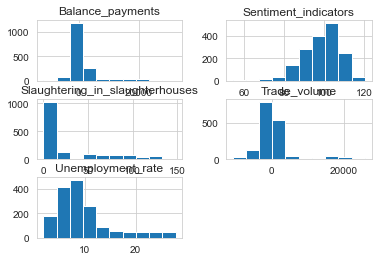

In [17]:
cols_with_missing = ['Balance_payments', 'Trade_volume', 'Sentiment_indicators', 'Unemployment_rate', 'Slaughtering_in_slaughterhouses']
df[cols_with_missing].hist()

Due to the change from Dtype object to numerical now there are more NAN values. I will impute the NAN´s per column with mean of each column .   
In the moment I don´t know exatly what happened Has to be some mistake in the data due to transforming. Have to check that if enough time. 
Column Slaughtering in Slaughterhouese has now 5,5 % NAN Values. I impute the column but maybe kick the indicator out.

From a Data Science perspective it is wrong to first replace NA and then split into train and test... You MUST first split into train and test, then replace NA by mean on train and then apply this stateful preprocessing model to test.

In [18]:
df['Youth_unemployment_rate'] = df['Youth_unemployment_rate'].fillna(value=df['Youth_unemployment_rate'].mean())

In [19]:
df['Balance_payments'] = df['Balance_payments'].fillna(value=df['Balance_payments'].mean())

In [20]:
df['Sentiment_indicators'] = df['Sentiment_indicators'].fillna(value=df['Sentiment_indicators'].mean())

In [21]:
df['Unemployment_rate'] = df['Unemployment_rate'].fillna(value=df['Unemployment_rate'].mean())

In [22]:
df['Slaughtering_in_slaughterhouses'] = df['Slaughtering_in_slaughterhouses'].fillna(value=df['Slaughtering_in_slaughterhouses'].mean())

In [23]:
df['Trade_volume'] = df['Trade_volume'].fillna(value=df['Trade_volume'].mean())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1677 entries, 2010-01-01 to 2020-09-01
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1677 non-null   object 
 1   Inflation_rate                   1677 non-null   float64
 2   Rental_housing                   1677 non-null   float64
 3   Balance_payments                 1677 non-null   float64
 4   Trade_volume                     1677 non-null   float64
 5   Sentiment_indicators             1677 non-null   float64
 6   Unemployment_rate                1677 non-null   float64
 7   Youth_unemployment_rate          1677 non-null   float64
 8   Slaughtering_in_slaughterhouses  1677 non-null   float64
dtypes: float64(8), object(1)
memory usage: 131.0+ KB


All NAN Values are now replaced by mean of each column

# 5. EDA: Data explained by descriptive statistics

##### 5.1 Describing the data

In [25]:
df.describe()

,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,0.121467,99.946708,1561.874284,935.231444,98.548389,9.813604,22.802948,27.165549
std,0.674115,11.808587,5439.544398,5450.561437,9.222367,5.639338,12.427099,36.449466
min,-2.500000,48.260000,-11753.000000,-10837.800000,54.400000,1.800000,4.800000,0.240000
25%,-0.200000,96.200000,-297.100000,-552.300000,92.700000,6.100000,13.300000,2.910000
50%,0.100000,100.030000,95.100000,-83.500000,99.900000,8.300000,20.300000,7.030000
75%,0.400000,104.200000,1414.000000,998.100000,105.200000,11.300000,28.200000,45.080000
max,3.400000,138.710000,32222.000000,25737.100000,120.300000,27.900000,61.700000,148.150000


- Watching Balance Payments and trade volume a big difference between mean and 50%(median). Its normal for these indicators. Investigated countries do have a different size and economic power.

- Trade volume: Its measured by Balance for values / Ratio for indexes. By reviewing the stats of the indicator, eg 50% median I realized that the indicator involves 2 different methods of counting. 1) For some countries its measured in Balance of values in Millions. 2) Other countries are measured by the ratio for indexes. This might be a problem for the regression models used in Analysis. I will get wrong results. In the moment I don´t have an answer to this question what I could do. Think I have to drop the column.

- Reviewing the columns Unemployment rate and Youth unemployment rate show scary results in a way. Mean total unemployment is 9,81%, Youth unemployment mean 22,80%. Median (50%) total ist 8,3%, where youth unemployment is 20,3%. The maximum value of Youth unemployment is 61,70%, where it is 27,90% total. I will investigate this further.

- Slaughtering in Slaughterhouses is measured by a thousand tons. Indicator has a very high Variance in its values. Min is 0,24 thousand tons, max 148,15 thousand tons. Mainly caused due to the fact that some countries might not be big producers of meat at all. Will be interesting to see if the production got effected by corona.

##### 5.2 EDA: Analyzing Unemployment_rate and Youth_unemployment_rate over time

Creating unemp_df datadrame from columns 'Unemployment_rate', 'Youth_unemployment_rate'

In [26]:
unemp_df = df[['Country','Unemployment_rate', 'Youth_unemployment_rate']]
unemp_df

,Country,Unemployment_rate,Youth_unemployment_rate
Datetime,,,
2010-01-01,BE,8.600000,24.500000
2010-02-01,BE,8.600000,24.500000
2010-03-01,BE,8.500000,24.500000
2010-04-01,BE,8.400000,22.600000
2010-05-01,BE,8.400000,22.600000
2010-06-01,BE,8.500000,22.600000
2010-07-01,BE,8.500000,21.200000
2010-08-01,BE,8.400000,21.200000
2010-09-01,BE,8.300000,21.200000


Grouping the Unemployment Dataframe by mean of Datetime to show the development <br> of the percentage of unemployment such as youth unemployment over the examined period \
creating vaiable unemp_df_grouped_2

In [27]:
unemp_df_grouped_2 = unemp_df.groupby('Datetime').mean()
unemp_df_grouped_2

,Unemployment_rate,Youth_unemployment_rate
Datetime,,
2010-01-01,10.938462,25.107692
2010-02-01,11.184615,25.707692
2010-03-01,11.253846,25.776923
2010-04-01,11.292308,25.676923
2010-05-01,11.246154,25.730769
2010-06-01,11.246154,25.446154
2010-07-01,11.146154,25.238462
2010-08-01,11.115385,24.992308
2010-09-01,11.076923,25.092308


##### 5.3 Plotting and interpretating the results of time series analysis

import of rcparams from pyplot

__Lineplot of mean percentage of total unemployment and youth unemployment over the examined period__

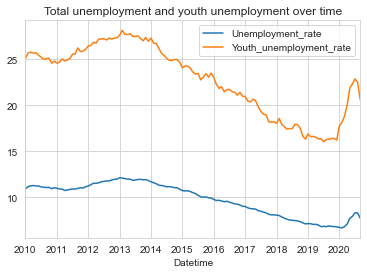

In [28]:
from pylab import rcParams
unemp_df_grouped_2.plot(kind='line', title='Total unemployment and youth unemployment over time')
rcParams['figure.figsize'] = 15, 4
plt.show()

__Interpretation__
- The mean of youth unemployment over the time period is on a much higher level than total unemployment. 
- The shape of curves is similar
- 2010 at about 25% against total about 11%
- The peak of youth unemloyment is seen at beginning 2014 with nearly 30%.
- until end of 2019 both curves fall relatively evenly, to a level of about 5% total, and 17% Youth unemployment
- In 2020 the curve of Youth unemployment rises sharply, by 6% from 17% to 23%, while the total unemployment, rises, but not as strong

__Conclusion__
- By descriptive statistics this lineplot proves that Corona has a major influence on aggregated Youth unemployment in researched European countries

__H0 != 0 --> rejected__ \
__H1 Hypothesis approved__


__Scatterplot of Youth Unemployment and total unemployment to get a picture of relation between the indicators__

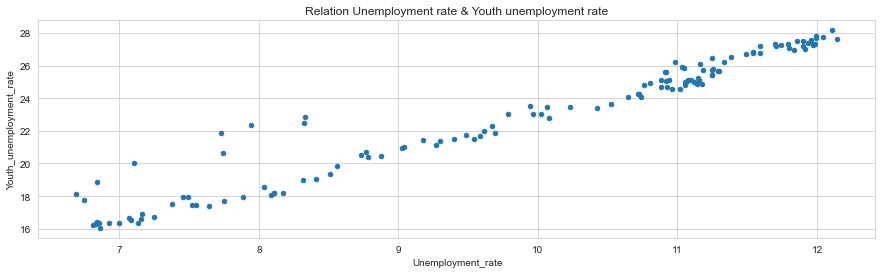

In [29]:
unemp_df_grouped_2.plot(x="Unemployment_rate", y="Youth_unemployment_rate", kind="scatter", 
                        title="Relation Unemployment rate & Youth unemployment rate")
rcParams['figure.figsize'] = 10, 5
plt.show()

__Interpretation__
- between both indicators exist a fairly strong positive correlation
- normal as Youth unemployment is a part of total unemployment
- some outliers are in the data but in this case they do have no direct influence on relation

__Distplot of Youth unemployment to show the distribution of the means from indicator__

count    129.000000
mean      22.802948
std        3.756427
min       16.053846
25%       19.353846
50%       23.615385
75%       25.776923
max       28.161538
Name: Youth_unemployment_rate, dtype: float64


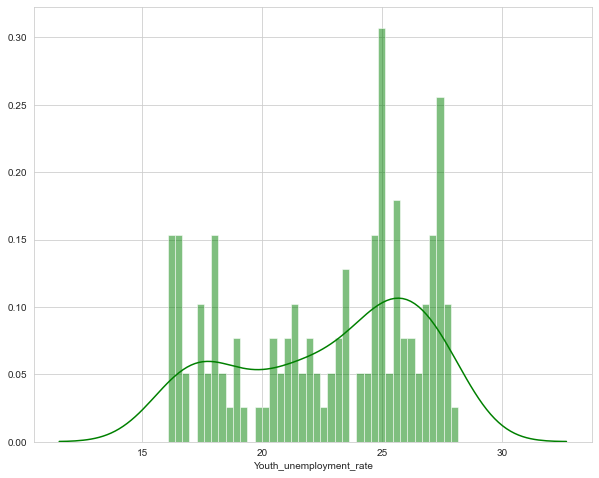

In [30]:
print(unemp_df_grouped_2['Youth_unemployment_rate'].describe())
plt.figure(figsize=(10, 8))
sns.distplot(unemp_df_grouped_2['Youth_unemployment_rate'], color='g', bins=40, hist_kws={'alpha': 0.5});

__Interpretation__ 
- Indicator Youth unemployment measures in group between 15 - 25 yr old
- X-axis show the distribution of unemployment in %
- Y-axis shows the density of distribution of mean
- The distribution of youth unemployment in anylized time period is between 16 and 26%
- looking to the curve there are 2 density peaks, one at around 17%, the maximum average density around 26%

##### 5.4 Analysing mean average of youth unemployment and total unemployment from researched countries 

Creating dataframe unemp_df_grouped to show mean percentage of Youth and total unemployment countrywise <br> sort order descending \
Highest average mean first

In [31]:
unemp_df_grouped = unemp_df.groupby('Country').mean()
unemp_df_grouped.sort_values('Unemployment_rate', ascending=False)

,Unemployment_rate,Youth_unemployment_rate
Country,,
EL,21.178400,45.152736
ES,20.137984,44.256589
IT,10.642636,34.533333
LT,10.418605,19.978363
FR,9.498450,22.930233
BG,8.795349,19.755837
EE,8.226357,16.998450
FI,8.120155,19.848837
BE,7.306977,19.643434


__Interpretation__
- Highest youth unemployment by mean percentage exists in South European countries
- Greece(EL) with 45% and Spain(ES) with 44% do have the highest mean average of youth unemployment in researched time period of analysed countries
- Followed by Italy with 34%
- Germany with 8.5% has the lowest mean average of researched countries, followed by Chekia and Denmark with both 13% 


##### 5.5 Plotting the results average mean unemployment by country in a Bar Plot

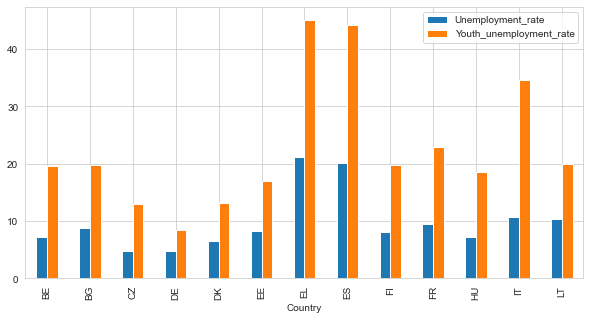

In [32]:
unemp_df_grouped.plot(kind="bar")
rcParams['figure.figsize'] = 15, 10
plt.show()

##### 5.5 Plotting the results average mean unemployment by country in a Bar Plot

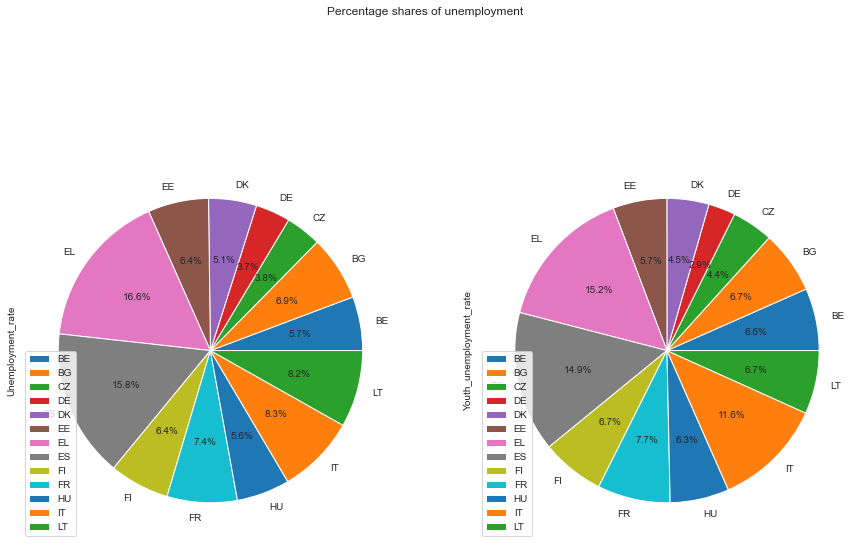

In [33]:
unemp_df_grouped.plot.pie(subplots=True, legend=True, autopct='%1.1f%%', title='Percentage shares of unemployment')
rcParams['figure.figsize'] = 16, 12
plt.show()

##### 5.6 Analyzing average mean of all used indicators over time intervall 2010 - 2020

__Creating Dataframe all_mean containing means of all indicators over time intervall__

In [34]:
all_mean = df.groupby('Datetime').mean()
all_mean

,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
Datetime,,,,,,,,
2010-01-01,-0.069231,88.748462,-847.353846,-557.784615,92.538462,10.938462,25.107692,31.862308
2010-02-01,0.346154,88.713077,-217.576923,264.938462,93.346154,11.184615,25.707692,29.376923
2010-03-01,0.953846,88.877692,489.184615,296.730769,95.000000,11.253846,25.776923,34.626923
2010-04-01,0.569231,89.113846,837.923077,172.076923,97.669231,11.292308,25.676923,29.609231
2010-05-01,0.192308,89.196154,-940.876923,-345.446154,97.161538,11.246154,25.730769,31.106154
2010-06-01,0.015385,89.448462,539.261538,192.361538,96.676923,11.246154,25.446154,31.586923
2010-07-01,-0.300000,90.103846,1002.484615,543.753846,97.653846,11.146154,25.238462,29.452308
2010-08-01,0.161538,90.778462,-77.861538,-448.092308,99.138462,11.115385,24.992308,33.984615
2010-09-01,0.430769,90.270769,563.015385,199.176923,98.976923,11.076923,25.092308,34.639231


__5.7 Plotting Balance Payment and Trade Volume over time 01/2010 - 09/2020 by lineplot__

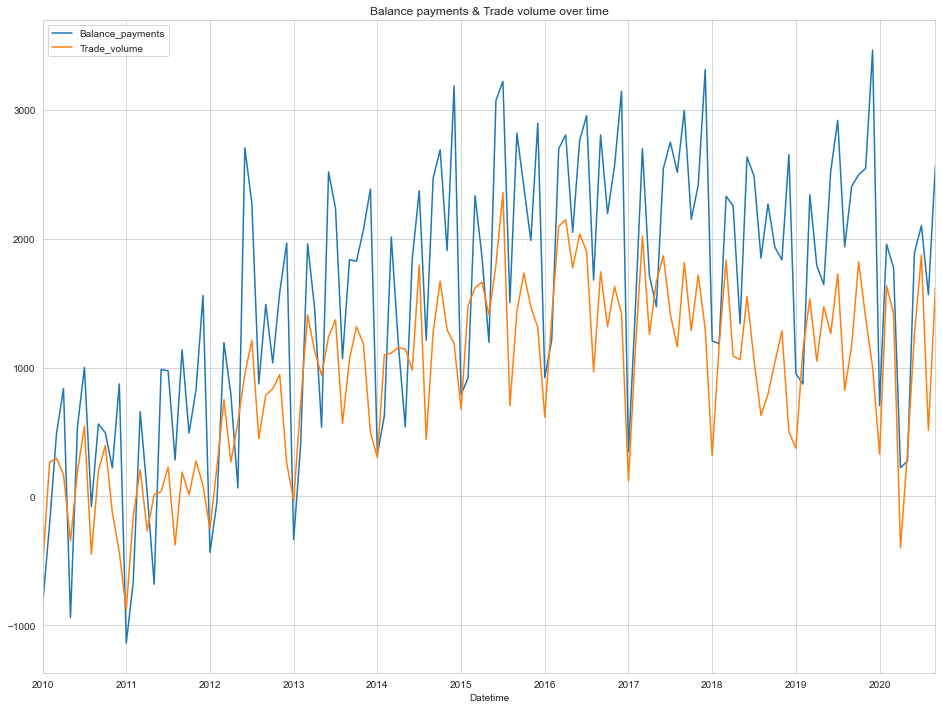

In [35]:
from pylab import rcParams
all_mean[['Balance_payments', 'Trade_volume']].plot(kind='line', 
                                                    title = 'Balance payments & Trade volume over time')
rcParams['figure.figsize'] = 15, 6
plt.show()

- Both are financial indicators are measured by value in Million Euros
- Its seen that both curves do have a strong relation to each other
- In 2020 when Lockdown in European countries started indicators are falling sharply
- Trade volume to the lowest value since 2011
- Both curves have very strong swings up and down. For a more detailed analysis, it would be advisable to optimize (smooth) the curves with suitable means

__5.8  Scatterplot Sentiment indicator & Balance Payment and Trade Volume over time 01/2010 - 09/2020 by lineplot__

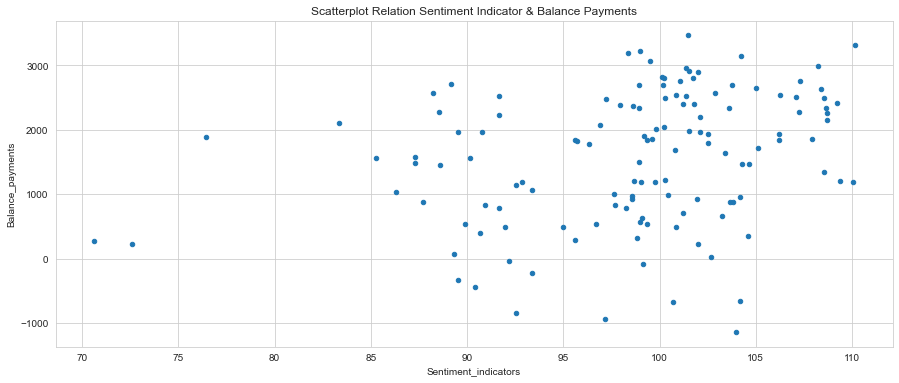

In [36]:
all_mean.plot(x="Sentiment_indicators", y="Balance_payments", kind="scatter", 
              title="Scatterplot Relation Sentiment Indicator & Balance Payments")
rcParams['figure.figsize'] = 15, 5
plt.show()

- Scapperplot shows that there is a positive relation between the Sentiment indicator and Balance payments
- High spread is visible

__5.9 Plotting Inflation rate, 	Rental housing, Sentiment_indicators, Slaughtering_in_slaughterhouses over time 01/2010 - 09/2020 by lineplot__

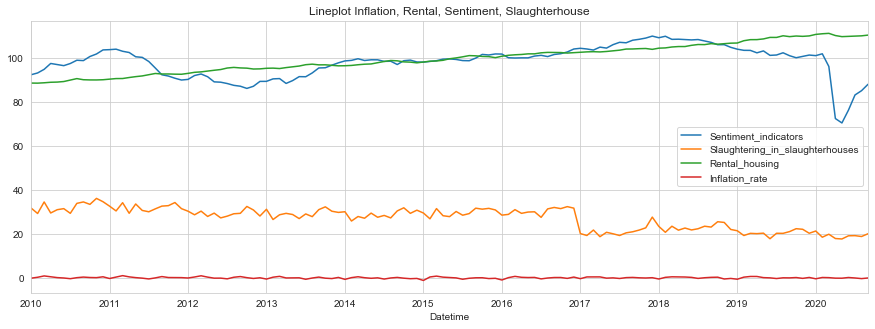

In [37]:
from pylab import rcParams
all_mean[['Sentiment_indicators', 'Slaughtering_in_slaughterhouses', 'Rental_housing', 'Inflation_rate']].plot(kind='line', 
                                                   title = 'Lineplot Inflation, Rental, Sentiment, Slaughterhouse')
rcParams['figure.figsize'] = 15, 6
plt.show()

__5.10 Interpretation of Lineplot__ 

- The Economic Sentiment index indicator from 2014 - 2017 has a nearly constant growth 
- Peak of analyzed time periodJanuary 2018. Then the line starts falling slowly. 
- The economic sentiment index falls dramatically at the beginning of lockdown February/March 2020.
- Meat production in Slaughterhauses not got effected strong by Coronavirus. I had this in mind before seeing this plot. Europe had the same population during lockdown. Less tourists coming to Europe for holidays from abroad but on other hand few european citizenz leaving Europe to abroad in that time
- Inflation rate does not get pictured good in this plot. Has normally a very small variance, apart from countries with Hyperinflation.

- From a socio-economic perspective, the line diagram shows a development caused by Corona, which has a major impact on large parts of society
- The green line of rental prices has a very linear gradient. Beginning 2020 it drops slightly, but recovered quickly 
- On the other hand we have higher unemployment rate since Corona, people who are in job have less income due to short-term work
- Lineplot shows tendency to rising imbalances in the European population. Of course is this lineplot on a very high aggregation level, but some important to watch on

# 6. EDA: Analyzing linear relation between Economic Sentiment Indicator and independent indicators by visualisation 

__Plotting linear regression Sentiment Indicator and Inflation Rate__

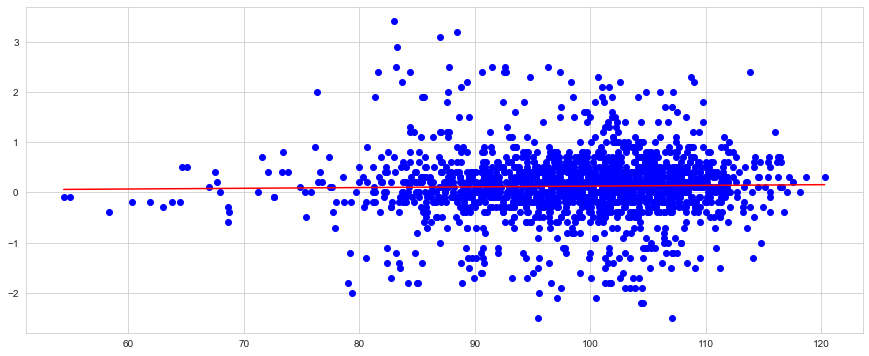

In [38]:
from scipy import stats

x = df['Sentiment_indicators']
y = df['Inflation_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- very week positive relation existing
- datapoints widely spread

__Plotting linear regression Sentiment Indicator and Balance Payments__

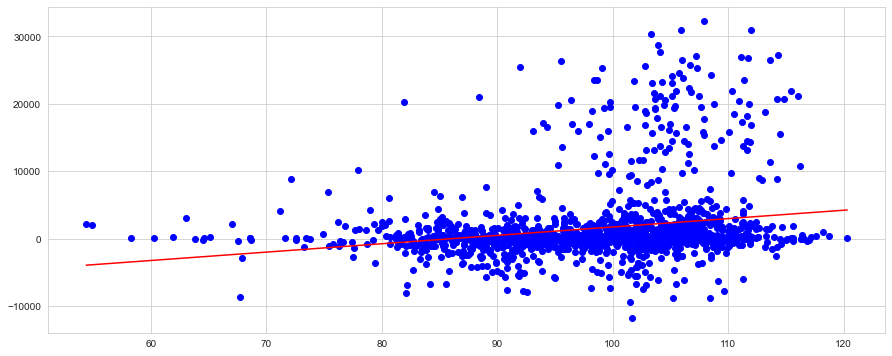

In [39]:
x = df['Sentiment_indicators']
y = df['Balance_payments']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- positive relation visible
- Balance payments can explain Sentiment indicator fairly good
- many outliers in a cluster. would be worth to do a deep dive in and research

__Plotting linear regression Sentiment Indicator and Rental Housing__

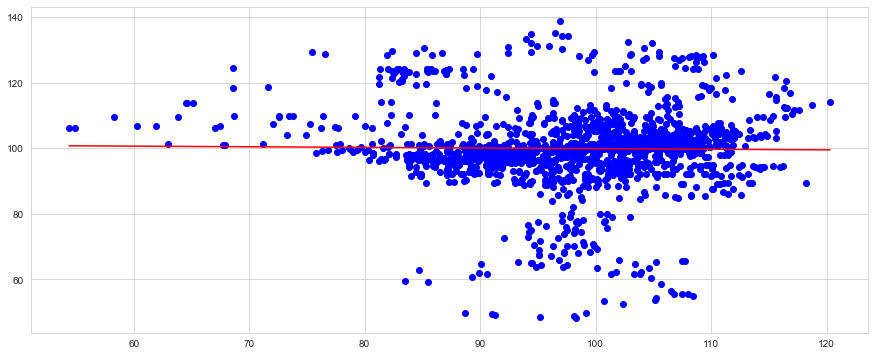

In [40]:
x = df['Sentiment_indicators']
y = df['Rental_housing']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- very weak negative relation visible
- I would rather say there´s no relation existing
- we saw earlier that rental prices were growing when sentiment indicator was not

__Plotting linear regression Sentiment Indicator and Trade Volume__

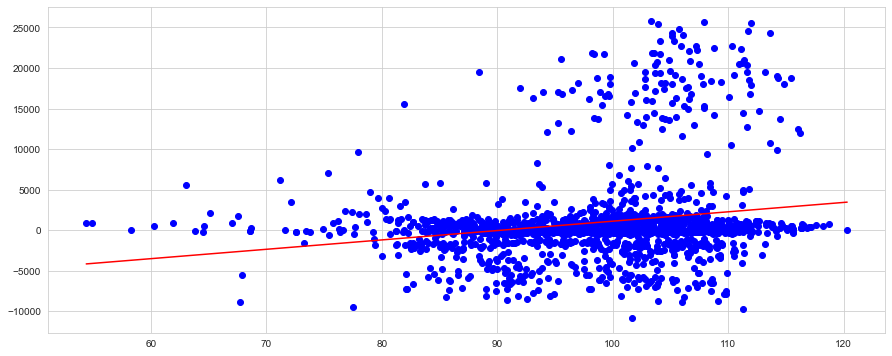

In [41]:
x = df['Sentiment_indicators']
y = df['Trade_volume']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- positive relation visible
- many outliers in a cluster. would be worth to do a deep dive in and research

__Plotting linear regression Sentiment Indicator and Unemployment Rate__

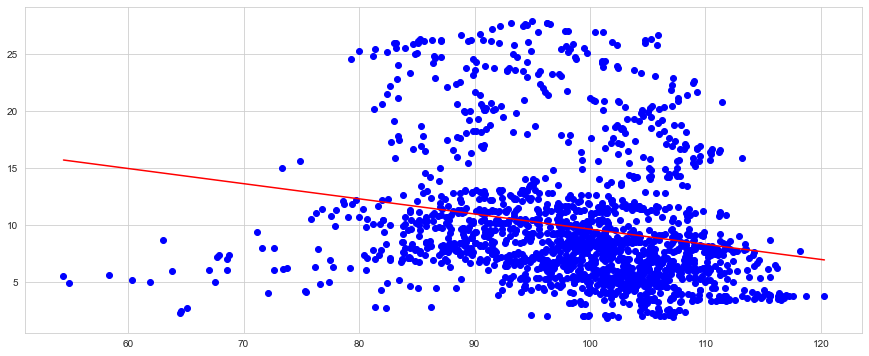

In [42]:
x = df['Sentiment_indicators']
y = df['Unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- unemployment negative related to Economic Sentiment indicator
- will explain the dependent indicator in multiple regression

__Plotting linear regression Sentiment Indicator and Youth Unemployment Rate__

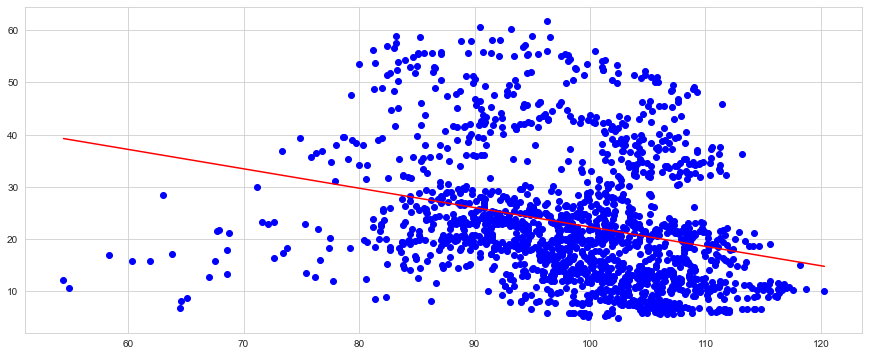

In [43]:
x = df['Sentiment_indicators']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- Youth unemployment rate is fairly negative related to Economic Sentiment indicator
- will explain the dependent indicator in multiple regression

__Plotting linear regression Sentiment Indicator and Slaughtering in Slaughterhouses__

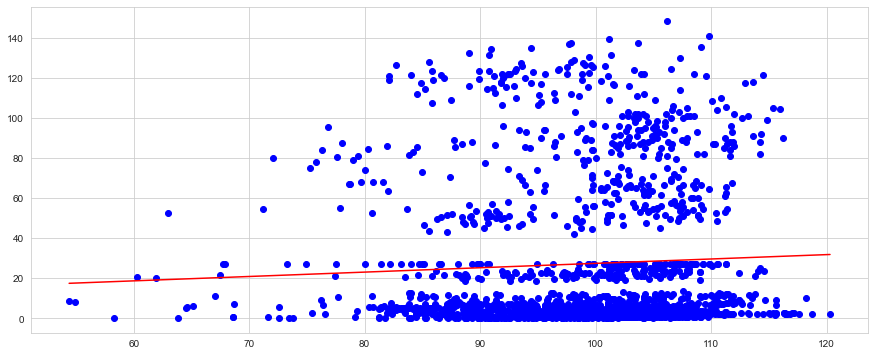

In [44]:
x = df['Sentiment_indicators']
y = df['Slaughtering_in_slaughterhouses']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- positive relation visible
- big cluster of outliers above the regression line

__Conclusion of visualisations__

All scatter plots with regression line show at least some kind of relation to Economic Sentiment Indicator. \
In regression part of this analysis we will see if used indicators are, if stacked together in a multiple regression, good enough to get a robust model, which explains Economic Sentiment indicator with a statistical significance of 95%

# 7. Inferential statistics

##### 7.1 Prove of Quality Economic Sentiment Indicator by one-sided T-test

__Hypothesis__

__H0:__ There is no significant difference along different countries pictured by the indicator. In case H0 gets stated I might have to use another indicator as dependent variable for Regression Panel Analysis cause Quality of composite indicator was not collected well.

__H1:__ There is a significant difference of means along the countries pictured by the composite indicator. Good to use as dependent variable in multiple regression analysis.

__Course of Procedure__
- I get samples of two countries economically related to each other
- 1) Germany
- 2) France
- We do have a sample size of n=129 for each country. Sentiment indicator over time intervall 01/2010 - 09/2020 has 129 entries each
- Both countries are geographically near together, both do have a strong economy, both have a low level of Youth unemployment
- We can assume that samples n=129 of Economic composite indicator from both countries should be related
- The one sided t-test proves this Hypothesis

__One sample t-test__

The t-test is mostly used to compare the mean value of two groups (mean value comparison). 

The t-test calculates a certain value (the t-value), which in turn represents the number of standard errors our samples are away from a mean of zero. \
The null hypothesis always assumes that there is no connection between the dependent and independent variables in the population, from which it follows that there should also be no connection between the difference in the measured values of the individual samples. Therefore, the mean of the differences between the measured values from the two samples should be zero on average.

The measurements from the sample can be used to estimate the population standard deviation. In order to do this we need to introduce a correction factor. The correction of n - 1 that we introduce is only minimal, but corrects more strongly for smaller samples.

In [45]:
df.head(1)

,Country,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
Datetime,,,,,,,,,
2010-01-01,BE,-1.4,93.03,-653.0,777.9,96.4,8.6,24.5,19.8


__Creating DataFrame variable countries_ttest containing countries and values of Economic Sentiment Indicator of all countries__

In [46]:
countries_ttest = df[['Country', 'Sentiment_indicators']]
countries_ttest.head(2)

,Country,Sentiment_indicators
Datetime,,
2010-01-01,BE,96.4
2010-02-01,BE,94.8


__Creating DataFrame pivot containing pivottable values=Sentiment_indicators, index=Datetime, columns=Country__

In [47]:
pivot_ttest = countries_ttest.pivot_table(values='Sentiment_indicators',index='Datetime', columns=['Country'])
pivot_ttest.head()

Country,BE,BG,CZ,DE,DK,EE,EL,ES,FI,FR,HU,IT,LT
Datetime,,,,,,,,,,,,,
2010-01-01,96.4,83.8,85.3,93.4,104.2,88.7,90.9,89.5,98.7,96.8,88.6,102.0,84.7
2010-02-01,94.8,85.3,87.7,95.3,107.4,91.0,88.6,90.3,103.8,95.1,88.8,101.9,83.5
2010-03-01,101.1,87.2,87.3,97.9,110.5,91.3,87.0,92.5,102.0,97.7,92.9,102.1,85.5
2010-04-01,103.6,87.8,93.0,102.6,113.5,95.2,87.0,93.6,107.1,100.5,93.6,102.9,89.3
2010-05-01,100.5,85.2,93.4,101.7,118.2,98.3,82.5,89.1,106.9,98.1,97.3,101.3,90.6


__Getting the mean and standard deviation of Sentiment Indicator over time intervall 2010 - 2020__

In [48]:
pivot_ttest.describe()

Country,BE,BG,CZ,DE,DK,EE,EL,ES,FI,FR,HU,IT,LT
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,98.829457,95.456589,96.534109,104.342636,99.554264,98.145736,94.658915,98.412403,97.332558,97.253488,102.927132,97.260065,100.421705
std,8.968107,8.883199,9.303439,7.132537,10.825282,6.421376,8.286752,9.272287,9.206886,8.482998,10.555380,10.188264,6.330531
min,60.300000,58.300000,64.500000,72.100000,54.400000,68.600000,79.300000,73.300000,68.700000,67.700000,75.400000,63.000000,81.900000
25%,94.300000,90.400000,91.000000,101.700000,95.800000,96.300000,87.000000,90.000000,90.400000,91.900000,93.600000,92.400000,96.700000
50%,100.700000,96.600000,99.400000,105.000000,101.000000,98.500000,94.500000,101.300000,95.600000,98.800000,105.700000,101.000000,100.400000
75%,104.700000,101.400000,103.400000,108.500000,106.200000,101.900000,102.000000,106.800000,105.100000,103.300000,110.600000,104.100000,106.200000
max,114.600000,109.700000,108.200000,116.200000,118.200000,108.400000,113.200000,111.400000,115.600000,112.900000,120.300000,111.800000,111.200000


Sentiment indicator Germany: \
__Mean: 104.342636__  
__Standard deviation: 7.132537__ 

Sentiment indicator France: \
__Mean: 97.253488__ \
__Standard Deviation: 8.482998__

Samplesize t-test: __n= (n-1) = 256__

__Calculating t-value by model__

In [49]:
import math

sample_mean = 97.253488
pop_mean = 104.342636
sample_std = 8.482998
n = 256
statistic = (sample_mean - pop_mean)/(sample_std/math.sqrt(n))
print("Statistic is: ", statistic)

Statistic is:  -13.371023781922371


__t-value = -13.371023781922371__

- we do have 256 degrees of freedom due to samplesize
- to not reject H0 we look into the table of t-value distribution. 
- t-value has to be less than 1.65 to reject H0
- if we work a 95 % significance niveau, we can reject H0
- H1 Hypothesis is prooved
- mean of sample group is different to mean of population

##### 7.2  P-value

Instead of comparing the critical t-value with the t-value, we can also compare the alpha level (α-level) with the p-value. The alpha level is the area under the graph, to the right of the positive critical t-value or to the left of the negative critical t-value. If this area is smaller than the alpha level, then we reject the null hypothesis.

If P ≤ α we reject the null hypothesis H0; otherwise we do not reject H0. Here, α (level of significance) usually corresponds to 5% or 0.1% for statistically highly significant results.

__P-value for tested samples__

- P-value:0,000000000002
- Value is very small, thats good
- using Niveau of significance 95% critical p-value is: 1,650828
- We can reject H0 and state H1

# 8. Correlation 

##### 8.1 Correlation Matrix

Creating a correlation matrix by Seaborn heatmap

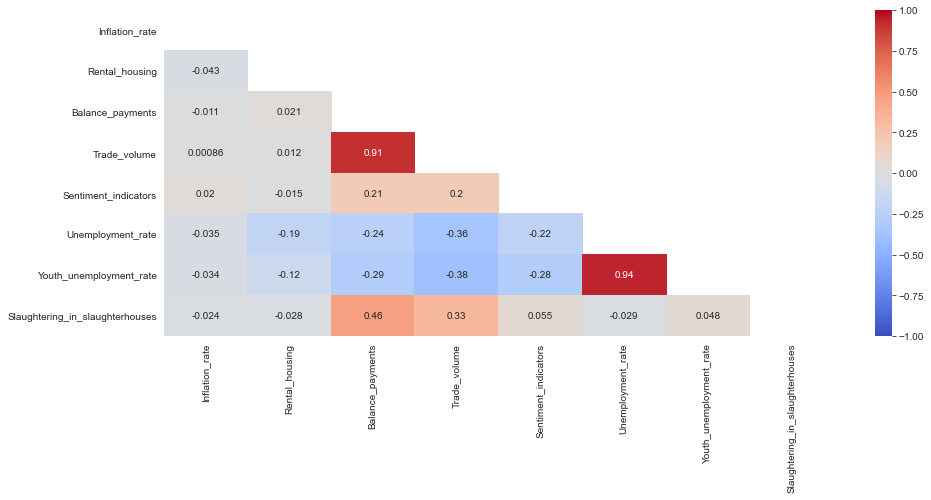

In [50]:
df_corr=matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

##### 8.2 Interpretation of results

- Correlation Heatmap works on a scale from -1 to 1. The closer to 1 or -1, the stronger the correlation/relation between variables
- It measures the strenght between indicators btw variables
- Interpretating results of correlation gives answer how strong (positive or negative) the relation between two factors is

- My hypothesis is that the used independent variables can explain the Economic Sentiment indicator
- The strength of this dependence shall be researched and pictured by machine learning regression models
- This correlation matrix pictures the same results I had in mind when investigating the scatter plots with regression lines
- The chosen independent indicators might not explain Economic Sentiment indicator sufficiently and on a relevant significance level of 95%

- Strength of correlation from independent Variables to Sentiment indicator explained:
- Inflation_rate:  no correlation
- Rental_housing: no correlation
- Balance_payments: potitive correlation 0.2. Correlation is not strong
- Trade_volume: potitive correlation 0.2. Correlation is not strong
- Unemployment_rate: negative correlation - 0.2. Correlation is not strong
- Youth_unemployment_rate: negative correlated, - 0.3
- Slaughtering_in_Slaughterhouses: very weak positive correlation of 0.05. This figure will not affect model

##### 8.3 Autocorrelation

- In correlation matrix there are 2 fields visible in a bright red color with values near 1:
- Trade_volume & Balance_payments: 0.91
- Youth_unemployment_rate & Unemployment_rate: 0.94

- When creating regression model to explain Economic Sentiment indicator it will cause problems due to Autocorrelation
- The variables among each other explain each other far better than they do explain the Economic Sentiment Indicator
- This can have a decisive influence on the regression models and lead to incorrect results

##### 8.4 Conclusion of the results so far and the next steps
- From what I saw until now I might have to reject H1 and state H0.
- The model with independent variables cannot explain Economic Sentiment indicator
- I will check this in models 
- If I´m right with my feelings about the model I will change regression model and use Youth_unemployment_rate as dependent variable trying to explain it via the independent. Think that model leads to much better results

# 9. Panel analysis: modeling regression

__Goal is to explain Economic Sentiment Indicator by independent variables of time-panel Dataframe df__

Import of necessary tools

In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold

import statsmodels.api as sm

##### 9.1 Using Train/Test Split on Dataframe
Splitting the data into a test set, and a train set. Test set is set to 30% of data

In [52]:
df.head(2)

,Country,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
Datetime,,,,,,,,,
2010-01-01,BE,-1.4,93.03,-653.0,777.9,96.4,8.6,24.5,19.80
2010-02-01,BE,2.3,93.10,-343.0,1396.6,94.8,8.6,24.5,18.54


__Column 'Country' has to be dropped out of Dataframe__

In [53]:
df.drop('Country', axis=1)
del df['Country']
df.head(2)

,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
Datetime,,,,,,,,
2010-01-01,-1.4,93.03,-653.0,777.9,96.4,8.6,24.5,19.80
2010-02-01,2.3,93.10,-343.0,1396.6,94.8,8.6,24.5,18.54


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "Sentiment_indicators"),
                                                    df.Sentiment_indicators, test_size = 0.3)

##### 9.2 Defining models for linear Regression Sklearn
- Linear Regression
- Lasso Regression
- Ridge Regression
- ElasticNet

In [55]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.0952495413823855, Test -> 0.1409907521890863
Lasso: Train -> 0.09049209843141948, Test -> 0.1203095292734726
Ridge: Train -> 0.0952495401308111, Test -> 0.14098386663844065
ElasticNet: Train -> 0.0923210595478704, Test -> 0.12623290769356366


##### 9.3 Using SVR Model, KNeighbors Regressor, DecisionTree Regressor, Gradient Booster, RandomForest Regressor, MLP Regressor

In [56]:
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> 0.03733148503828754, Test -> 0.02415700341905469


In [57]:
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.30761280137537095, Test -> -0.06088453985845721


In [58]:
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 1.0, Test -> 0.44959243922213843


In [59]:
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.7113765101923488, Test -> 0.5153252435813462
RandomForestRegressor: Train -> 0.9488775707695846, Test -> 0.6340772603116334


In [60]:
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation(mlpr, X_train, y_train)

MLPRegressor: Train -> -1.060793601993426, Test -> -1.3852474934409904


##### 9.4 Interpretation of results Regression on Economic Sentiment Indicator
- Using the R^2-value to see how the model performs
- As more near the R^2 value gets to 1 the better model performance
- The R^2 value of namy models is between 0.1 and 0.2
- I will keep it short
- All results of different sklearn regression models, except GradientBoostingRegressor (R^2=0.5169) and RandomForestRegressor (R°2=0,66) do show the same:
- Modeling the dependence of Economic Sentiment Indicator from independent variables doesn´t work out.
- R2 is low to prove statistical significance of Hypothesis
- I could use Results of GradientBooster and RandomForest, going deeper to anazizing results but not now due to lack of time



__Conclusion__
Hypothesis is not approved \

__H0 == 0: proved. No significant influence of regression model__ \
__H1 != 1: rejected!__

# 10. Panel analysis: modeling regression on Youth Unemployment Rate


__Goal is to explain Economic Sentiment Indicator by independent variables of time-panel Dataframe df__

##### 10.1 Using Train/Test Split on Dataframe 

In [61]:
df.head(1)

,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
Datetime,,,,,,,,
2010-01-01,-1.4,93.03,-653.0,777.9,96.4,8.6,24.5,19.8


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = "Youth_unemployment_rate"),
                                                    df.Sentiment_indicators, test_size = 0.3)

##### 10.2 Defining models for linear Regression Sklearn
- Linear Regression
- Lasso Regression
- Ridge Regression
- ElasticNet

In [63]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 1.0, Test -> 1.0
Lasso: Train -> 0.9998337419285765, Test -> 0.9998271197615359
Ridge: Train -> 0.9999999998730292, Test -> 0.9999999998643844
ElasticNet: Train -> 0.9998358740307056, Test -> 0.999829325588919


##### 10.3 Interpretation of results
- All regression results show a very high statistical significance of the regression model to explain Youth Unemployment rate by independent variables
- Model has a significance on a 99,9% level

__But why?__ \
It might be that the most relevant fact is justified by the very high correlation between Youth Unemployment and Total Unemployment as Youth Unemployment is a part of total. We will check that in next chapter.

### 10.4 Multiple linear Regression on Youth Unemployment Rate with Statsmodels


This chapter will use Statsmodels to model multiple linear regression on Youth Unemployment. There are existing seven explaining variables. I will do 7 iterations of regression with statsmodels. Each time I do add one variable. In last iteration Total Unemployment rate gets added to see how the model performance changes when adding a variable with super high correlation. 

In [64]:
df.head(1)

,Inflation_rate,Rental_housing,Balance_payments,Trade_volume,Sentiment_indicators,Unemployment_rate,Youth_unemployment_rate,Slaughtering_in_slaughterhouses
Datetime,,,,,,,,
2010-01-01,-1.4,93.03,-653.0,777.9,96.4,8.6,24.5,19.8


__1st iteration: inflation_rate__

In [65]:
X = df["Inflation_rate"]
y = df["Youth_unemployment_rate"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.020
Model:                                 OLS   Adj. R-squared (uncentered):              0.019
Method:                      Least Squares   F-statistic:                              33.41
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                    8.90e-09
Time:                             11:15:43   Log-Likelihood:                         -7824.7
No. Observations:                     1677   AIC:                                  1.565e+04
Df Residuals:                         1676   BIC:                                  1.566e+04
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Inflation_rate     5.3012      0.917      5.780      0.000       3.502       7.100
==============================================================================
Omnibus:                      232.624   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.628
Skew:                           1.034   Prob(JB):                     1.32e-73
Kurtosis:                       3.724   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__2nd iteration: 1 + Slaughtering_in_Slaughterhouses__

In [66]:
X = df[["Inflation_rate", "Slaughtering_in_slaughterhouses"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.304
Model:                                 OLS   Adj. R-squared (uncentered):              0.303
Method:                      Least Squares   F-statistic:                              365.2
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                   2.40e-132
Time:                             11:15:44   Log-Likelihood:                         -7537.9
No. Observations:                     1677   AIC:                                  1.508e+04
Df Residuals:                         1675   BIC:                                  1.509e+04
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflation_rate                      3.5280      0.776      4.545      0.000       2.006       5.050
Slaughtering_in_slaughterhouses     0.3057      0.012     26.140      0.000       0.283       0.329
==============================================================================
Omnibus:                       40.200   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.267
Skew:                          -0.237   Prob(JB):                     8.19e-14
Kurtosis:                       3.799   Cond. No.                         66.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__3rd iteration: 2 + Balance_payments__

In [67]:
X = df[["Inflation_rate", "Slaughtering_in_slaughterhouses", "Balance_payments"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.344
Model:                                 OLS   Adj. R-squared (uncentered):              0.343
Method:                      Least Squares   F-statistic:                              293.2
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                   6.19e-153
Time:                             11:15:44   Log-Likelihood:                         -7487.2
No. Observations:                     1677   AIC:                                  1.498e+04
Df Residuals:                         1674   BIC:                                  1.500e+04
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflation_rate                      3.4595      0.753      4.592      0.000       1.982       4.937
Slaughtering_in_slaughterhouses     0.3765      0.013     28.304      0.000       0.350       0.403
Balance_payments                   -0.0011      0.000    -10.208      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       50.715   Durbin-Watson:                   0.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.989
Skew:                          -0.185   Prob(JB):                     7.13e-23
Kurtosis:                       4.150   Cond. No.                     8.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__4th iteration: 3 + Trade_volume__

In [68]:
X = df[["Inflation_rate", "Slaughtering_in_slaughterhouses", "Balance_payments", "Trade_volume"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.364
Model:                                 OLS   Adj. R-squared (uncentered):              0.363
Method:                      Least Squares   F-statistic:                              239.5
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                   1.01e-162
Time:                             11:15:44   Log-Likelihood:                         -7461.7
No. Observations:                     1677   AIC:                                  1.493e+04
Df Residuals:                         1673   BIC:                                  1.495e+04
Df Model:                                4                                                  
Covariance Type:                 nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflation_rate                      3.5530      0.742      4.787      0.000       2.097       5.009
Slaughtering_in_slaughterhouses     0.3449      0.014     24.949      0.000       0.318       0.372
Balance_payments                    0.0005      0.000      2.033      0.042    1.74e-05       0.001
Trade_volume                       -0.0016      0.000     -7.198      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      128.921   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.072
Skew:                          -0.483   Prob(JB):                     2.51e-61
Kurtosis:                       4.749   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__5th iteration: 4 + Rental housing__

In [69]:
X = df[["Inflation_rate", "Slaughtering_in_slaughterhouses", "Balance_payments", 
        "Trade_volume", "Rental_housing"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.794
Model:                                 OLS   Adj. R-squared (uncentered):              0.793
Method:                      Least Squares   F-statistic:                              1287.
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                             11:15:44   Log-Likelihood:                         -6517.4
No. Observations:                     1677   AIC:                                  1.304e+04
Df Residuals:                         1672   BIC:                                  1.307e+04
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflation_rate                     -0.2103      0.428     -0.492      0.623      -1.049       0.628
Slaughtering_in_slaughterhouses     0.0665      0.009      7.248      0.000       0.049       0.085
Balance_payments                    0.0004      0.000      2.874      0.004       0.000       0.001
Trade_volume                       -0.0014      0.000    -10.561      0.000      -0.002      -0.001
Rental_housing                      0.2124      0.004     59.024      0.000       0.205       0.219
==============================================================================
Omnibus:                      122.828   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.218
Skew:                           0.726   Prob(JB):                     3.96e-33
Kurtosis:                       2.837   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__6th iteration: 5 + Sentiment Indicators__

In [70]:
X = df[["Inflation_rate", "Slaughtering_in_slaughterhouses",
        "Balance_payments", "Trade_volume", "Sentiment_indicators", "Rental_housing"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.797
Model:                                 OLS   Adj. R-squared (uncentered):              0.796
Method:                      Least Squares   F-statistic:                              1094.
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                             11:15:44   Log-Likelihood:                         -6504.2
No. Observations:                     1677   AIC:                                  1.302e+04
Df Residuals:                         1671   BIC:                                  1.305e+04
Df Model:                                6                                                  
Covariance Type:                 nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflation_rate                     -0.3528      0.425     -0.829      0.407      -1.187       0.481
Slaughtering_in_slaughterhouses     0.0632      0.009      6.926      0.000       0.045       0.081
Balance_payments                    0.0004      0.000      2.755      0.006       0.000       0.001
Trade_volume                       -0.0014      0.000    -10.721      0.000      -0.002      -0.001
Sentiment_indicators                0.1006      0.019      5.158      0.000       0.062       0.139
Rental_housing                      0.1160      0.019      6.100      0.000       0.079       0.153
==============================================================================
Omnibus:                      150.991   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.290
Skew:                           0.831   Prob(JB):                     1.07e-42
Kurtosis:                       3.068   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__7th iteration: 6 + Unemployment rate__

In [71]:
X = df[["Inflation_rate", "Slaughtering_in_slaughterhouses",
        "Balance_payments", "Trade_volume", "Sentiment_indicators", "Rental_housing", "Unemployment_rate"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.981
Model:                                 OLS   Adj. R-squared (uncentered):              0.981
Method:                      Least Squares   F-statistic:                          1.221e+04
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                             11:15:44   Log-Likelihood:                         -4525.5
No. Observations:                     1677   AIC:                                      9065.
Df Residuals:                         1670   BIC:                                      9103.
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Inflation_rate                      0.0721      0.131      0.551      0.582      -0.184       0.329
Slaughtering_in_slaughterhouses     0.0510      0.003     18.148      0.000       0.045       0.056
Balance_payments                   -0.0006    4.3e-05    -12.806      0.000      -0.001      -0.000
Trade_volume                        0.0003   4.18e-05      7.103      0.000       0.000       0.000
Sentiment_indicators               -0.0624      0.006    -10.174      0.000      -0.074      -0.050
Rental_housing                      0.0778      0.006     13.295      0.000       0.066       0.089
Unemployment_rate                   2.0739      0.016    126.539      0.000       2.042       2.106
==============================================================================
Omnibus:                      217.563   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              427.565
Skew:                           0.800   Prob(JB):                     1.43e-93
Kurtosis:                       4.886   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Iteration 8: only total unemployment__

In [72]:
X = df[["Unemployment_rate"]]
y = df["Youth_unemployment_rate"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Youth_unemployment_rate   R-squared (uncentered):                   0.972
Model:                                 OLS   Adj. R-squared (uncentered):              0.972
Method:                      Least Squares   F-statistic:                          5.895e+04
Date:                     Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                             11:15:44   Log-Likelihood:                         -4832.5
No. Observations:                     1677   AIC:                                      9667.
Df Residuals:                         1676   BIC:                                      9672.
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Unemployment_rate     2.2625      0.009    242.798      0.000       2.244       2.281
==============================================================================
Omnibus:                      194.877   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.696
Skew:                           0.804   Prob(JB):                     7.62e-69
Kurtosis:                       4.381   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 10.5 Visualisation of choosen single linear relations by plotting with regression scatter plots

__Plotting total unemployment & youth unemployment__

In [ ]:
x = df['Unemployment_rate']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- very strong positive linear relation visible

__Plotting Youth Unemployment & Slaughtering in Slaughterhouses__

In [ ]:
x = df['Slaughtering_in_slaughterhouses']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [ ]:
x = df['Youth_unemployment_rate']
y = df['Slaughtering_in_slaughterhouses']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

__Plotting Youth Unemployment & Balance_payments__

In [ ]:
x = df['Balance_payments']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- negative relation visible

__Plotting Youth Unemployment & Trade_volume__

In [ ]:
x = df['Trade_volume']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- negative relation visible

__Plotting Youth Unemployment & Sentiment indicators__

In [ ]:
x = df['Sentiment_indicators']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- negative relation visible

__Plotting Youth Unemployment & Rental Housing__

In [ ]:
x = df['Rental_housing']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- negative related

__Plotting Youth Unemployment & Inflation Rate__

In [ ]:
x = df['Inflation_rate']
y = df['Youth_unemployment_rate']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

- visible that there is no real relationship

##### 10.6 Interpretation of results

- For me this simple example of multiple regression of a time panel how to perfectly can enhance a model by adding the right indicators
- the model develops with each indicator added, from R^2 0.02 (no dependence) in first iteration to statistical significance of model from 98,1 when adding total unemployment rate into the regression 97% of the data is explained

- Iterations development R^2: \
<br>
- 1st Iteration R-squared (uncentered): 0.020 
- 2nd Iteration R-squared (uncentered): 0.304 
- 3rd Iteration R-squared (uncentered): 0.344 
- 4th Iteration R-squared (uncentered): 0.364 
- 5th Iteration R-squared (uncentered): 0.794 
- 6th Iteration R-squared (uncentered): 0.797 
- 7th Iteration R-squared (uncentered): 0.981 
<br>

- when we take variable total unemployment out of the regression model, what is the more accurate, we still have an R^2 value of 0.8
- means that 80 percent of the in analysis used data is explained by the model
- taking out total unemployment gives the model a higher crediability
- i taken a look on iteration 8 its visible that if we only take total unemployment in the regression
<br>
- taking a look on the f statistic iteration 6:

__F-Distribution__ 
- A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals
- on a 95% significance Nivau
- critical value for Degrees of Freedom 1671 and 6: __2,11__
- in the valid model of iteration 6 we do have F-distribution of: __F-statistic: 	1094__
- The value of used regression model is smaller than critical value

__Conclusion__

__H0 != 0, H0 gets rejected__
__H1 == 1, H1 is proved

__The independent variables used in multiple regression on a 95% significance level are valid to explain Youth Unemployment rate__

# 11. Conclusion of analysis

On a high aggegated level this analysis researched socio-economic impacts of Coronavirus in european countries.
Used was constructed panel DataFrame over time-period from 2010 - 2020. The major prework was done in excel. Importing raw table, data cleaning and manipulation, Choosing indicators, time perios and coutries, transposing the tables and merge them to one multi-level table with panel data.  

Goal of this work was testing 4 different Hypothesis 3 different ways, eg on different levels of used tools to analyse and proof Hypothesis. 

One by EDA (only by visualisation), one by one sided t-test, two by regression machine learning algorithms. 

Three times H0 was rejected and H1 was proved, means there was a clear influence btw significance visible, one time not. H0 had to be accepted

__Hypothesis 1: Corona had an impact in Youth unemployment in Europe:__ H1 prooved by visualisation \
__Hypothesis 2: The Economic Sentiment Indicator has significant difference of means along the countries pictured by:__ H1 prooved, by one sided t-test \
__Hypothesis 3: Regression model can explain dependence of Economic Sentiment Indicator by independent variables of used dataframe:__ H0 accepted, model does not explain Sentiment Indicator \
__Hypothesis 4: Paneldata of available indicators can explain dependence of Youth unemployment:__ H1 prooved, by different regression models with focus on multiple regression model from statsmodels

One major goal of this analysis was to explain how indications are related to each other and how they got impacted due to Coronavirus. When taking the different levels of this work together dependence and socio-economic impact of Coronavirus on european population gets stated and prooved.

__What would I do different if doing same analysis again?__
- I would take a look fore different indicators. This time I used only indicators from Corona related indicators of Eurostats. The choice of monthly collected indicators wasn´t too big
- I would do more country specific EDA over time to lower aggrgation level and get more inside views of differences in development of indicators over time
- I would try concatenating and merging all single tables with Pandas in Python. Couldn´t concentrate on that task this time. In Excel I had a clue of what to do.
- I would take a look deeper look on the more advanced regression models for panel data for the analysis, liked fixed effect models and random effect models, which map multi-level panel data better
- Last but not least, I would give myself more time. This time I did the 'make two out of one' concept. With other words work more, sleep less, and you´ll get two weeks active work time out of one. If this would be researched in a Panel analysis I´m sure it would get prooved that over a long time period that´s not very healthy.